In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
Data_Analysts_Df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
Exploded_DF = Data_Analysts_Df.explode('job_skills')

In [ ]:
Grouped_DF = Exploded_DF.groupby('job_skills').agg(
    skill_count =('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

In [8]:
Grouped_DF.sort_values(by='skill_count',ascending=False,inplace=True)

In [10]:
Grouped_DF = Grouped_DF.head(10)

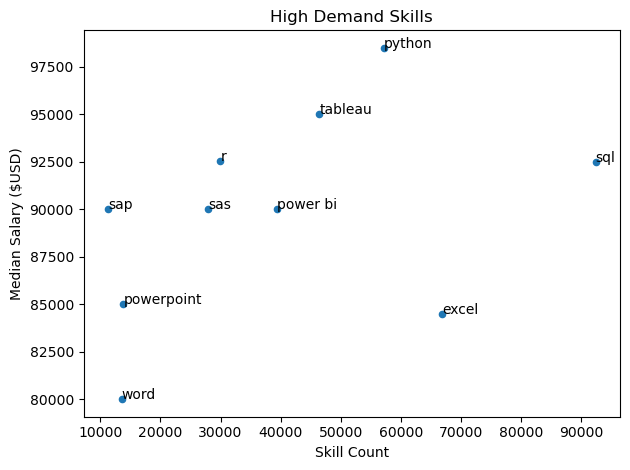

In [23]:
Grouped_DF.plot(kind='scatter',x='skill_count',y='median_salary')
for i,txt in enumerate(Grouped_DF.index):
    plt.text(Grouped_DF['skill_count'].iloc[i],Grouped_DF['median_salary'].iloc[i],txt)
plt.title('High Demand Skills')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('Skill Count')
plt.tight_layout()
plt.show()